<a href="https://colab.research.google.com/github/ormayraz/ormayraz.github.io/blob/master/Another_copy_of_Phreeqc_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **R&D Experiments Analysis File - Electrochemical Analysis**

# Phreeqc Web

This notebook collects a list of examples to quickly get started with Phreeqc Web.

* GitHub repo: https://github.com/rispr/phreeqc_web
* Available databases: https://github.com/rispr/phreeqc_web/tree/main/database

## Usage

Run the first block below and then each example can run independently.

## Useful references

* Phreeqc user guide: https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/html/final.html
* Phreeqc Basic interpreter (useful in the PUNCH block): https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/phreeqc3-html/phreeqc3-54.htm

### Feedback? Suggestions? Requests of new features?
Then get in touch with Riccardo Sprocati (ricspr@protonmail.com).



In [ ]:
# -----------------------
# ---- RUN ME FIRST! ----
# -----------------------

# Add libraries
!pip install phreeqpy

# Import libraries
import ipywidgets as widgets
import urllib.request
import phreeqpy.iphreeqc.phreeqc_dll as phreeqc_mod
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

# Download the IPhreeqc Library and database (the .dll extension is only to make the file appear on the Google Colab directory)
urllib.request.urlretrieve('https://github.com/rispr/phreeqc_web/blob/main/Iphreeqc_compiled/libiphreeqc-3.7.3.so?raw=true', 'libiphreeqc.dll')
lib = '/content/libiphreeqc.dll'

# Function to load and read the database
def get_database(dbName):
  urllib.request.urlretrieve('https://raw.githubusercontent.com/rispr/phreeqc_web/main/database/'+ dbName, dbName)
  # If not using Google Colab the directory will be different
  dbase = '/content/' + dbName
  return dbase

# Function to read and run the input Iphreeqc script
def runPhreeqcSim(lib, dbase, pqc_input):
    phreeqc = phreeqc_mod.IPhreeqc(lib)
    phreeqc.load_database(dbase)
    phreeqc.run_string(pqc_input)
    phreeqc.set_output_file_on()
    return phreeqc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 MB 12.5 MB/s eta 0:00:00



# Seawater concentration database
Selection of seawater to be used in the analysis can be viewed here



# Example 1 - Simple reaction

This example shows how to simulate the reaction between KH2PO4 and K2HPO4 and visualize the results in a dataframe.

In [ ]:
# Define the database
dbase = get_database('llnl.dat')

# Define the Phreeqc input script to be executed
pqc_input = """

SELECTED_OUTPUT 1
-reset false
-high_precision true
-charge_balance true
-pe true
-pH true
-alkalinity true
-ionic_strength true
-temperature true
-totals     C(4) Ca Mg
-molalities Na+ Cl-
-equilibrium_phases Fix_pH
-saturation_indices Calcite Brucite

USER_PUNCH 1
-headings rho(kg/L) SC(μS/cm)
-start
1 PUNCH RHO
2 PUNCH SC
-end

SOLUTION 1
temp	17.9
pH	8.21
pe	4
redox	pe
units	mg/kgs
density	1
Alkalinity	2.6465	meq/kg solution
B	4
Ca	400
Cl	19247.3	Charge
K	480
Mg	1400
Na	9416
S	892
Sr	8

PHASES
Fix_pH
H+ = H+
log_k 0

EQUILIBRIUM_PHASES 1
Fix_pH 	-9.5	 NaOH	10
SAVE SOLUTION	2
END

"""

phreeqc = runPhreeqcSim(lib, dbase, pqc_input)

print("List of components present in the system:")
print(phreeqc.get_component_list())

# Get output
data = pd.DataFrame(phreeqc.get_selected_output_array())
print(phreeqc.get_selected_output_array())
data.columns = data.iloc[0]
data = data[1:]
# Display data table
display(data)

List of components present in the system:
['B', 'C', 'Ca', 'Cl', 'K', 'Mg', 'Na', 'S', 'Sr']
[['pH', 'pe', 'temp(C)', 'Alk(eq/kgw)', 'mu', 'charge(eq)', 'C(4)(mol/kgw)', 'Ca(mol/kgw)', 'Mg(mol/kgw)', 'm_Na+(mol/kgw)', 'm_Cl-(mol/kgw)', 'Fix_pH', 'd_Fix_pH', 'si_Calcite', 'si_Brucite', 'rho(kg/L)', 'SC(μS/cm)'], [8.21, 4.0, 17.9, 0.0027335564683047143, 0.6084187203586683, -6.046236812180952e-17, 0.002475936876389052, 0.010308847184245067, 0.0594961086638802, 0.4051903784906525, 0.5315481776827532, 0.0, 0.0, 0.6683466199782944, -2.1515062812914056, 1.032811953650169, 0.0], [9.5, -4.2921271188829575, 17.9, 0.0043019545893072325, 0.6077616165742424, -7.82805482888661e-17, 0.002475872546576452, 0.01030857933969112, 0.05949456283548619, 0.40680769238098, 0.5315522137479681, 9.998431490102675, -0.0015685098973250433, 1.5951411084638243, 0.42333659172453864, 1.032847844868809, 0.0]]


,pH,pe,temp(C),Alk(eq/kgw),mu,charge(eq),C(4)(mol/kgw),Ca(mol/kgw),Mg(mol/kgw),m_Na+(mol/kgw),m_Cl-(mol/kgw),Fix_pH,d_Fix_pH,si_Calcite,si_Brucite,rho(kg/L),SC(μS/cm)
1,8.21,4.0,17.9,0.002734,0.608419,-0.0,0.002476,0.010309,0.059496,0.40519,0.531548,0.0,0.0,0.668347,-2.151506,1.032812,0.0
2,9.5,-4.292127,17.9,0.004302,0.607762,-0.0,0.002476,0.010309,0.059495,0.406808,0.531552,9.998431,-0.001569,1.595141,0.423337,1.032848,0.0


# Example 2 - Automatic input

This example shows how the input concentration of KH2PO4 and K2HPO4 can be changed using sliders (press Ctrl + Enter to run the cell).
This approach can also be used to automate the change of certain inputs according to a list of variables e.g., for model exploration, uncertainty analysis and optimization.

In [ ]:
# Define the database
dbase = get_database('phreeqc.dat')

# Define Phreeqc input script to be executed
pqc_input_str = """
SOLUTION 1
-units mmol/L
-temp 25
-pH 7
-water 1
Na 0.01
Cl 0.01

REACTION 1
KH2PO4	%s
K2HPO4	%s

SELECTED_OUTPUT
-reset false
-high_precision true
-charge_balance true
-pe true
-pH true
-alkalinity true
-ionic_strength true
-temperature true
-totals     Na Cl K P
-molalities Na+ Cl-

USER_PUNCH
-headings rho(kg/L) SC(μS/cm)
-start
1 PUNCH RHO
2 PUNCH SC
-end
"""

# Initialize Iphreeqc and load the database
phreeqc = phreeqc_mod.IPhreeqc(lib)
phreeqc.load_database(dbase)

# Function to substitute the markers in the input text and run IPhreeqc
def runSim(phreeqc, *params):
  # Parse Phreeqc input
  pqc_input = pqc_input_str % params

  phreeqc = runPhreeqcSim(lib, dbase, pqc_input)

  # Get output
  data = pd.DataFrame(phreeqc.get_selected_output_array())
  data.columns = data.iloc[0]
  data = data[1:]
  display(data)
  # Display data table
  return data
7
# Change the concentration with sliders
conc_KH2PO4 = 0 #@param {type:"slider", min:0, max:1, step:0.1}
conc_K2HPO4 = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}

# Run the simulation
data=runSim(phreeqc, conc_KH2PO4, conc_K2HPO4)


,pH,pe,temp(C),Alk(eq/kgw),mu,charge(eq),Na(mol/kgw),Cl(mol/kgw),K(mol/kgw),P(mol/kgw),m_Na+(mol/kgw),m_Cl-(mol/kgw),rho(kg/L),SC(μS/cm)
1,7.0,4.0,25.0,0.0,0.00001,-0.0,0.00001,0.00001,0.0,0.0,0.00001,0.00001,0.997043,1.313963
2,6.42976,-0.876491,25.0,0.5,1.743723,-0.0,0.00001,0.00001,1.5,1.0,0.000009,0.00001,1.105634,90669.333485


# Example 3 - Breakthrough plot

This example illustrates how to visualize a breakthrough plot (Example 11 of the Phreeqc User Guide).

,step,Na(mol/kgw),Cl(mol/kgw),K(mol/kgw),Ca(mol/kgw),rho(kg/L),SC(μS/cm)
1,-99,0.0,0.0012,0.0,0.0006,0.997099,152.751993
2,-99,0.001,0.0,0.0002,0.0,0.997113,145.9398
3,-99,0.001,0.0,0.0002,0.0,0.997113,145.9398
4,1,0.000528,0.0012,0.000458,0.000107,0.997097,158.831683
5,0,0.001,0.0,0.0002,0.0,0.997113,145.9398
...,...,...,...,...,...,...,...
121,116,0.0,0.0012,0.0,0.0006,0.997099,152.752833
122,117,0.0,0.0012,0.0,0.0006,0.997099,152.75267
123,118,0.0,0.0012,0.0,0.0006,0.997099,152.752538
124,119,0.0,0.0012,0.0,0.0006,0.997099,152.752432


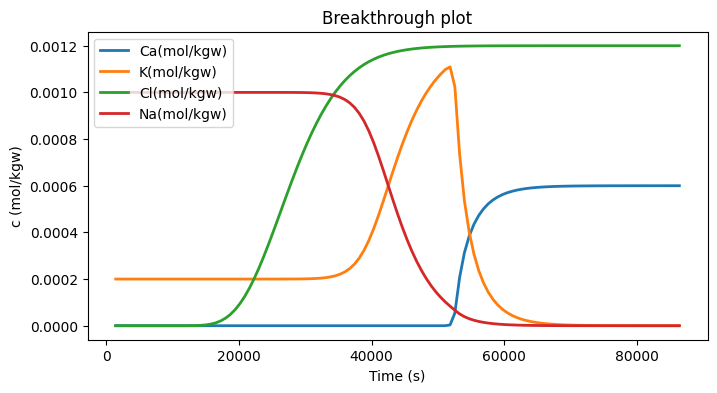

In [ ]:
# Define the database
dbase = get_database('phreeqc.dat')

# Define Phreeqc input script to be executed
pqc_input = """TITLE Example 11.--Transport and ion exchange.
SOLUTION 0  CaCl2
        units            mmol/kgw
        temp             25.0
        pH               7.0     charge
        pe               12.5    O2(g)   -0.68
        Ca               0.6
        Cl               1.2

SOLUTION 1-40  Initial solution for column
        units            mmol/kgw
        temp             25.0
        pH               7.0     charge
        pe               12.5    O2(g)   -0.68
        Na               1.0
        K                0.2
        N(5)             1.2
EXCHANGE 1-40
        equilibrate 1
        X                0.0011
TRANSPORT
        -cells           40
        -length          0.002
        -shifts          120
        -time_step       720.0
        -flow_direction  forward
        -boundary_cond   flux    flux
        -diffc           0.0e-9
        -dispersivity    0.002
        -correct_disp    true
        -punch           40
        -punch_frequency 1
        -print           40
        -print_frequency 20
SELECTED_OUTPUT
        -reset           false
        -step
        -totals          Na Cl K Ca
USER_PUNCH
-headings rho(kg/L) SC(μS/cm)
-start
1 PUNCH RHO
2 PUNCH SC
-end
"""

phreeqc = runPhreeqcSim(lib, dbase, pqc_input)

# Get output
data = pd.DataFrame(phreeqc.get_selected_output_array())
data.columns = data.iloc[0]
data = data[1:]
# Display data table
display(data)

# Plot figure
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(111)

# Plot data only after the first step
data=data[data['step']>1]

ax1.plot(data['step']*720, data['Ca(mol/kgw)'], label='Ca(mol/kgw)', linewidth=2)
ax1.plot(data['step']*720, data['K(mol/kgw)'], label='K(mol/kgw)', linewidth=2)
ax1.plot(data['step']*720, data['Cl(mol/kgw)'], label='Cl(mol/kgw)', linewidth=2)
ax1.plot(data['step']*720, data['Na(mol/kgw)'], label='Na(mol/kgw)', linewidth=2)

plt.title('Breakthrough plot')
plt.xlabel('Time (s)')
plt.ylabel('c (mol/kgw)')

plt.legend(loc='upper left');
plt.show()

# Example 4 - Spatial profiles (uphill diffusion)

This example shows a spatial profile plot of multicomponent diffusion considering charge interactions (adapted from https://www.hydrochemistry.eu/exmpls/electro_dif.html).

,step,m_H+(mol/kgw),m_NO3-(mol/kgw),m_Na+(mol/kgw),m_Cl-(mol/kgw),rho(kg/L),SC(μS/cm),dist,pot_V
1,0,0.000001,0.000001,0.0001,0.0001,0.997047,12.94551,0.0,0.0
2,0,0.0001,0.0001,0.0001,0.0001,0.997051,54.321802,0.000167,0.0
3,0,0.0001,0.0001,0.0001,0.0001,0.997051,54.321802,0.0005,0.0
4,0,0.0001,0.0001,0.0001,0.0001,0.997051,54.321802,0.000833,0.0
5,0,0.0001,0.0001,0.0001,0.0001,0.997051,54.321802,0.001167,0.0
...,...,...,...,...,...,...,...,...,...
60,10,0.000099,0.0001,0.0001,0.0001,0.997051,53.940461,0.008832,-0.0231
61,10,0.000099,0.0001,0.0001,0.0001,0.997051,54.069189,0.009166,-0.023143
62,10,0.0001,0.0001,0.0001,0.0001,0.997051,54.177987,0.009499,-0.023179
63,10,0.0001,0.0001,0.0001,0.0001,0.997051,54.275137,0.009832,-0.023211


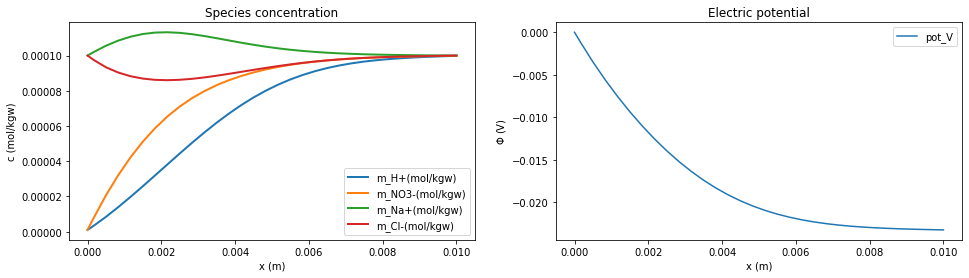

In [ ]:
# Define the database
dbase = get_database('phreeqc.dat')

# Define Phreeqc input script to be executed
pqc_input = """
SOLUTION 0
 pH 6 charge; N(5) 1e-3; Na 0.1; Cl 0.1
 -water 1e5 # increase the volume for constant concentrations, because
#             concentration changes are calculated when electro-migration is invoked
SOLUTION 1-30
 pH 4 charge; N(5) 0.1; Na 0.1; Cl 0.1
 -water 0.3333
SOLUTION 31
 pH 4 charge; N(5) 0.1; Na 0.1; Cl 0.1
 -water 1e5
END

TRANSPORT
-cells 30
-lengths 3.333e-4
-boundary_conditions 1 1
-punch_cells 0-31
-shifts 10
-punch_frequency 10
-fix_current -1e-10
-flow_direction diffusion_only
-time 2 min 1
-multi_d true 1e-9 1 0.0 1.0
-implicit true 4

SELECTED_OUTPUT
        -reset           false
        -step
        -molalities          H+ NO3- Na+ Cl-

USER_PUNCH
-headings rho(kg/L) SC(μS/cm) dist pot_V
-start
1 PUNCH RHO
2 PUNCH SC
3 PUNCH dist
4 punch pot_V
-end
"""

phreeqc = runPhreeqcSim(lib, dbase, pqc_input)

# Get output
data = pd.DataFrame(phreeqc.get_selected_output_array())
data.columns = data.iloc[0]
data = data[1:]
# Display data table
display(data)

# Plot data only at the 10th shift
data=data[data['step']==10]

# Plot figure
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)

ax1.plot(data['dist'], data['m_H+(mol/kgw)'], label='m_H+(mol/kgw)', linewidth=2)
ax1.plot(data['dist'], data['m_NO3-(mol/kgw)'], label='m_NO3-(mol/kgw)', linewidth=2)
ax1.plot(data['dist'], data['m_Na+(mol/kgw)'], label='m_Na+(mol/kgw)', linewidth=2)
ax1.plot(data['dist'], data['m_Cl-(mol/kgw)'], label='m_Cl-(mol/kgw)', linewidth=2)

plt.title('Species concentration')
plt.xlabel('x (m)')
plt.ylabel('c (mol/kgw)')

plt.legend(loc='lower right');


ax1 = fig.add_subplot(122)

# Plot data only at the 10th shift
data=data[data['step']==10]

ax1.plot(data['dist'], data['pot_V'], label='pot_V')

plt.title('Electric potential')
plt.xlabel('x (m)')
plt.ylabel('$\Phi$ (V)')

plt.legend(loc='upper right');

plt.show()

# Example 5 - Electrokinetic transport

This example illustrates the transport of charged species during electromigration as a result of the application of an external electric potential gradient. Note that although the concentration of "Chloride-" is 10 mM at the cathodic side, only a concentration of 5 mM can enter in the domain as a result of charge interations. The exaplanation of this concept is present in Sprocati, R., & Rolle, M. (2020). Charge interactions, reaction kinetics and dimensionality effects on electrokinetic remediation: A model-based analysis. Journal of Contaminant Hydrology, 229, 103567.

,step,m_Chloride-(mol/kgw),m_Sodium+(mol/kgw),m_Nitrate-(mol/kgw),rho(kg/L),SC(μS/cm),dist,pot_V
1,-99,0.01,0.01,0.0,0.997063,699.764539,0.0,0.0
2,-99,0.0,0.005,0.005,0.997053,356.531761,0.0,0.0
3,-99,0.0,0.005,0.005,0.997053,356.531761,0.0,10.0
4,1,0.01,0.01,0.0,0.997065,703.045992,0.0,0.0
5,0,0.0,0.005,0.005,0.997053,356.531761,0.00125,0.0
...,...,...,...,...,...,...,...,...
400,3000,0.0,0.00497,0.005058,0.997053,357.444712,0.23875,9.545176
401,3000,0.0,0.004984,0.005073,0.997053,358.428443,0.24125,9.646654
402,3000,0.0,0.004999,0.005089,0.997053,359.51803,0.24375,9.747831
403,3000,0.0,0.005016,0.005106,0.997053,360.690129,0.24625,9.848684


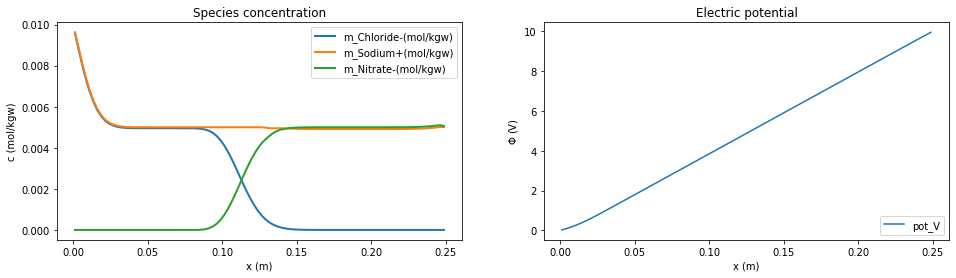

In [ ]:
# Define the database
dbase = get_database('minteq.dat')

# Define Phreeqc input script to be executed
pqc_input = """
SOLUTION_MASTER_SPECIES
Sodium          Sodium+         0.0     Sodium        1.0
Chloride        Chloride-       0.0     Chloride      1.0
Nitrate          Nitrate-         0.0     Nitrate        1.0
Dummycation 	Dummycation+	0.0	Dummycation		1.0
Dummyanion 	Dummyanion-	0.0	Dummyanion		1.0

SOLUTION_SPECIES
Sodium+ = Sodium+
	log_k 0
	-dw	1e-9
Chloride- = Chloride-
	log_k 0
	-dw	1e-9
Nitrate- = Nitrate-
	log_k 0
	-dw	1e-9
Dummycation+ = Dummycation+
	log_k 0
	-dw	1e-9
Dummyanion- = Dummyanion-
	log_k 0
	-dw	1e-9

PHASES
pH_Fix_CAT
HDummyanion = Dummyanion- + H+
log_k 0

pH_Fix_AN
DummycationOH = Dummycation+ + OH-
log_k 0

# ================================================================
# Solutions
# ================================================================

SOLUTION 0
-units mmol/L
pH 7
Chloride 10
Sodium 10 charge
-water 1e5

SOLUTION 1-100
-units mmol/L
pH 7
Sodium 5 charge
Nitrate 5
-water 1e-5

SOLUTION 101
-units mmol/L
pH 7
Sodium 5 charge
Nitrate 5
-water 1e5
potential 10

EQUILIBRIUM_PHASES 0
pH_Fix_AN -7 DummycationOH 10

EQUILIBRIUM_PHASES 101
pH_Fix_CAT -7 HDummyanion 10

PRINT
-reset false

# ================================================================
# Transport
# ================================================================

TRANSPORT
-cells 100
-lengths 0.0025
-boundary_conditions 1 1
-multi_d true 1e-9 0.1 0.0 1
-flow_direction diffusion_only
-time_step 0.1 hour
-shifts 3000
-punch_frequency 1000
-punch_cells 1-100
-implicit true 12

SELECTED_OUTPUT
        -reset           false
        -step
        -molalities          Chloride- Sodium+ Nitrate-
USER_PUNCH
-headings rho(kg/L) SC(μS/cm) dist pot_V
-start
1 PUNCH RHO
2 PUNCH SC
3 PUNCH dist
4 PUNCH pot_V
-end
"""

phreeqc = runPhreeqcSim(lib, dbase, pqc_input)

# Get output
data = pd.DataFrame(phreeqc.get_selected_output_array())
data.columns = data.iloc[0]
data = data[1:]
# Display data table
display(data)

# Plot only selected data
data=data[data['step']==2000]

# Plot figure
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)

ax1.plot(data['dist'], data['m_Chloride-(mol/kgw)'], label='m_Chloride-(mol/kgw)', linewidth=2)
ax1.plot(data['dist'], data['m_Sodium+(mol/kgw)'], label='m_Sodium+(mol/kgw)', linewidth=2)
ax1.plot(data['dist'], data['m_Nitrate-(mol/kgw)'], label='m_Nitrate-(mol/kgw)', linewidth=2)

plt.title('Species concentration')
plt.xlabel('x (m)')
plt.ylabel('c (mol/kgw)')

plt.legend(loc='upper right');


ax1 = fig.add_subplot(122)

ax1.plot(data['dist'], data['pot_V'], label='pot_V')

plt.title('Electric potential')
plt.xlabel('x (m)')
plt.ylabel('$\Phi$ (V)')

plt.legend(loc='lower right');
plt.show()